<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predict-country-location-from-flag-attributes" data-toc-modified-id="Predict-country-location-from-flag-attributes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predict country location from flag attributes</a></span></li><li><span><a href="#The-data" data-toc-modified-id="The-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The data</a></span></li><li><span><a href="#Creating-the-data-and-labels" data-toc-modified-id="Creating-the-data-and-labels-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Creating the data and labels</a></span><ul class="toc-item"><li><span><a href="#Splitting-the-data-into-training-and-test-sets" data-toc-modified-id="Splitting-the-data-into-training-and-test-sets-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Splitting the data into training and test sets</a></span></li></ul></li><li><span><a href="#Training-and-scoring-the-model" data-toc-modified-id="Training-and-scoring-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training and scoring the model</a></span><ul class="toc-item"><li><span><a href="#Scoring-the-model" data-toc-modified-id="Scoring-the-model-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Scoring the model</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Plotting-training-and-test-scores-for-each-depth" data-toc-modified-id="Plotting-training-and-test-scores-for-each-depth-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting training and test scores for each depth</a></span><ul class="toc-item"><li><span><a href="#Result" data-toc-modified-id="Result-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Using-different-features" data-toc-modified-id="Using-different-features-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Using different features</a></span><ul class="toc-item"><li><span><a href="#Deriving-custom-features" data-toc-modified-id="Deriving-custom-features-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Deriving custom features</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Final-iteration" data-toc-modified-id="Final-iteration-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final iteration</a></span><ul class="toc-item"><li><span><a href="#Choosing-new-features" data-toc-modified-id="Choosing-new-features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Choosing new features</a></span></li></ul></li><li><span><a href="#Final-results" data-toc-modified-id="Final-results-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Final results</a></span></li></ul></div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Predict country location from flag attributes

This project uses flag data from 194 countries across the world. There are 30 features for each flag, describing aspects of the design, country population, etc.

The data is from UCI's machine learning repository.

Each flag is also associated with a numerical landmass, ranging from 1-6. This specifies what continent the flag belongs to.

The aim is to accurately predict which continent a flag comes from based on features of the flag.

The algorithm used will be a Decision Tree Classifier. Classification accuracy for different depths of tree will be tested and the optimal depth will be found.

# The data

In [2]:
flags = pd.read_csv('flags.csv', header = 0)

In [3]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [4]:
# number of countries
len(flags)

194

In [5]:
# the features and number of features
flags.columns, len(flags.columns)

(Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
        'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
        'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
        'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
        'Text', 'Topleft', 'Botright'],
       dtype='object'),
 30)

In [6]:
# how many unique landmasses - one for every continent (except Antartica)
flags.Landmass.unique()

array([5, 3, 4, 6, 1, 2], dtype=int64)

# Creating the data and labels

In [9]:
# End goal is to use a decision tree to classify what Landmass a country is on

# the target to be predicted is the landmass
labels = flags['Landmass']

# for now, choosing the following columns and test classification accuracy
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange",
              "Circles","Crosses","Saltires","Quarters","Sunstars",
              "Crescent","Triangle"]]

## Splitting the data into training and test sets

In [10]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state = 1)

# Training and scoring the model

In [11]:
# try 20 different levels of tree
tree_depth = range(1, 21)

for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(train_data, train_labels)
    print("Depth " + str(i) + ":", tree.score(test_data, test_labels))

Depth 1: 0.3469387755102041
Depth 2: 0.3877551020408163
Depth 3: 0.5102040816326531
Depth 4: 0.5510204081632653
Depth 5: 0.5510204081632653
Depth 6: 0.5102040816326531
Depth 7: 0.4489795918367347
Depth 8: 0.4489795918367347
Depth 9: 0.4489795918367347
Depth 10: 0.4489795918367347
Depth 11: 0.4489795918367347
Depth 12: 0.4489795918367347
Depth 13: 0.4489795918367347
Depth 14: 0.4489795918367347
Depth 15: 0.4489795918367347
Depth 16: 0.4489795918367347
Depth 17: 0.4489795918367347
Depth 18: 0.4489795918367347
Depth 19: 0.4489795918367347
Depth 20: 0.4489795918367347


## Scoring the model

In [12]:
# first scoring the model on the training set
# also finding the feature importances when using all features
scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(train_data, train_labels)
    scores.append(tree.score(train_data, train_labels))
    if i == np.max(tree_depth):
        feat_importances = tree.feature_importances_

In [21]:
first_tree_train_score = np.max(scores)
first_tree_train_score

0.8482758620689655

In [22]:
# then scoring the model on the test set
test_scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(train_data, train_labels)
    test_scores.append(tree.score(test_data, test_labels))

In [23]:
first_tree_test_score = np.max(test_scores)
first_tree_test_score

0.5510204081632653

## Feature importance

To get a sense of which features being used in the model are influencing the classifier the most, we can visualise the feature importances using a barplot.

In [24]:
feat_importances

array([0.06828063, 0.09376988, 0.0813991 , 0.1190839 , 0.05407274,
       0.07101667, 0.0384369 , 0.10579752, 0.04588962, 0.        ,
       0.02743105, 0.18871886, 0.00871893, 0.09738421])

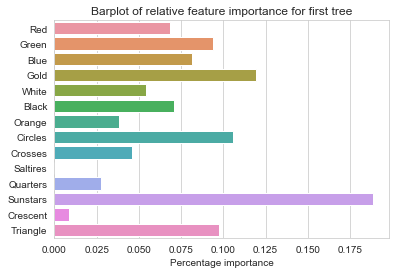

In [26]:
sns.barplot(x=feat_importances, y=data.columns)
plt.title('Barplot of relative feature importance for first tree')
plt.xlabel('Percentage importance')
plt.show()

# Plotting training and test scores for each depth

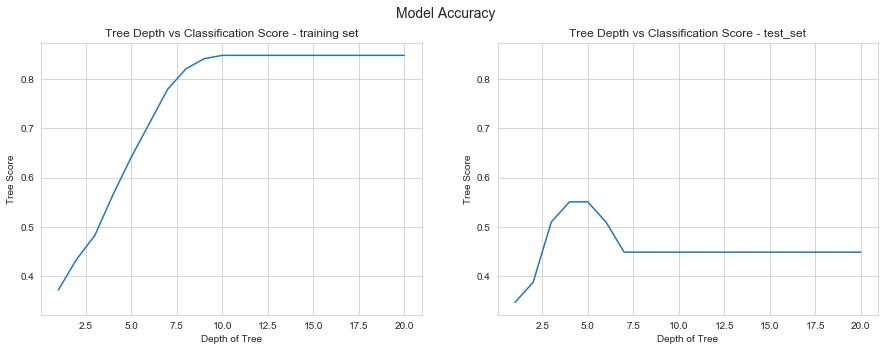

In [63]:
sns.set_style('whitegrid')

fig, axes = plt.subplots(2, 1, figsize=(15, 5))
plt.suptitle('Model Accuracy', fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x=tree_depth, y=scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - training set')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2 = sns.lineplot(x=tree_depth, y=test_scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - test_set')

plt.show()

## Result

The training score keeps improving until around a depth of 10 and then plateaus, while the test set peaks at a depth of around 4 and then decreases. The model is overfitting with increasing depth, and the peak test accuracy is only around 55%.

Overall, this model is not performing well. To attempt to improve model we can change the data to include other features.

Two features that may help are `Topleft` and `Botright`. These should provide more definition for each flag and so could improve accuracy.

# Using different features

In [28]:
flags['Topleft'].unique()

array(['black', 'red', 'green', 'blue', 'white', 'orange', 'gold'],
      dtype=object)

In [29]:
flags['Botright'].unique()

array(['green', 'red', 'white', 'black', 'blue', 'gold', 'orange',
       'brown'], dtype=object)

## Deriving custom features

The `Topleft` and `Botright` columns have string values describing the colour in that region of the flag. In order to use them in the decision tree classifier, two new columns must be added that have integer values for each colour. The following will be applied:

* black = 0
* white = 1
* red = 2
* green = 3
* blue = 4
* gold = 5
* orange = 6
* brown = 7

In [30]:
def colour_to_num(colour):
    if colour == 'black':
        return 0
    if colour == 'white':
        return 1
    if colour == 'red':
        return 2
    if colour == 'green':
        return 3
    if colour == 'blue':
        return 4
    if colour == 'gold':
        return 5
    if colour == 'orange':
        return 6
    if colour == 'brown':
        return 7

In [31]:
flags['TopleftNum'] = flags['Topleft'].apply(colour_to_num)

In [32]:
flags['BotrightNum'] = flags['Botright'].apply(colour_to_num)

In [33]:
flags.head()

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright,TopleftNum,BotrightNum
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,1,0,0,1,0,0,black,green,0,3
1,Albania,3,1,29,3,6,6,0,0,3,...,1,0,0,0,1,0,red,red,2,2
2,Algeria,4,1,2388,20,8,2,2,0,3,...,1,1,0,0,0,0,green,white,3,1
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,1,1,1,0,blue,red,4,2
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,blue,red,4,2


In [34]:
flags.TopleftNum.unique()

array([0, 2, 3, 4, 1, 6, 5], dtype=int64)

In [35]:
flags.BotrightNum.unique()

array([3, 2, 1, 0, 4, 5, 6, 7], dtype=int64)

In [36]:
new_data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange",
            "Circles", "Crosses","Saltires","Quarters","Sunstars",
            "Crescent","Triangle", "TopleftNum", "BotrightNum"]] # added the two new features

In [37]:
ntrain_data, ntest_data, ntrain_labels, ntest_labels = train_test_split(new_data, labels, random_state = 1)

In [38]:
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ntrain_data, ntrain_labels)
    print("Depth " + str(i) + ":", tree.score(ntest_data, ntest_labels))

Depth 1: 0.3469387755102041
Depth 2: 0.3877551020408163
Depth 3: 0.5102040816326531
Depth 4: 0.5306122448979592
Depth 5: 0.5510204081632653
Depth 6: 0.5306122448979592
Depth 7: 0.46938775510204084
Depth 8: 0.42857142857142855
Depth 9: 0.4489795918367347
Depth 10: 0.4489795918367347
Depth 11: 0.46938775510204084
Depth 12: 0.40816326530612246
Depth 13: 0.4489795918367347
Depth 14: 0.4489795918367347
Depth 15: 0.42857142857142855
Depth 16: 0.46938775510204084
Depth 17: 0.46938775510204084
Depth 18: 0.46938775510204084
Depth 19: 0.46938775510204084
Depth 20: 0.4489795918367347


In [39]:
new_scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ntrain_data, ntrain_labels)
    new_scores.append(tree.score(ntrain_data, ntrain_labels))
    if i == np.max(tree_depth):
        new_feat_importances = tree.feature_importances_

In [41]:
second_tree_train_score = np.max(new_scores)
second_tree_train_score

0.9103448275862069

In [42]:
new_test_scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ntrain_data, ntrain_labels)
    new_test_scores.append(tree.score(ntest_data, ntest_labels))

In [43]:
second_tree_test_score = np.max(test_scores)
second_tree_test_score

0.5510204081632653

In [44]:
new_feat_importances

array([0.04075919, 0.08417203, 0.06670704, 0.06977967, 0.05508516,
       0.04767363, 0.03829874, 0.0377468 , 0.03957886, 0.        ,
       0.01494107, 0.11055271, 0.02280712, 0.06603858, 0.11627032,
       0.18958909])

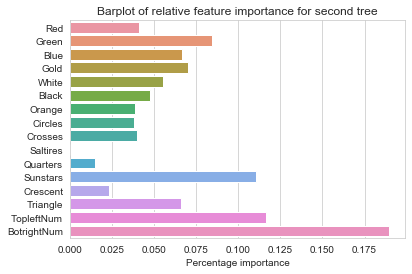

In [46]:
sns.barplot(x=new_feat_importances, y=new_data.columns)
plt.title('Barplot of relative feature importance for second tree')
plt.xlabel('Percentage importance')
plt.show()

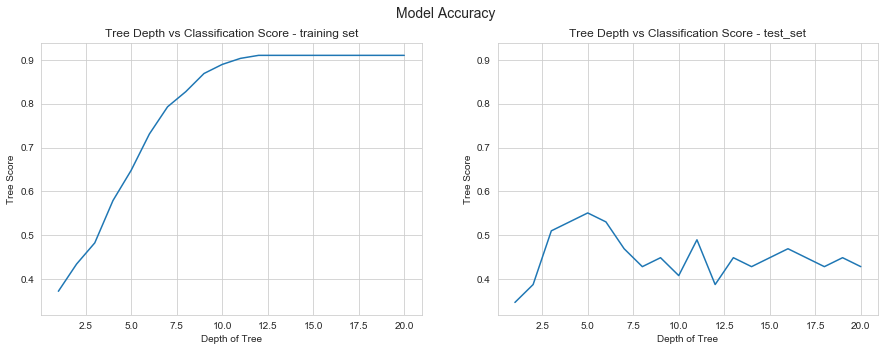

In [62]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
plt.suptitle('Model Accuracy', fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x=tree_depth, y=new_scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - training set')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2 = sns.lineplot(x=tree_depth, y=new_test_scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - test_set')

plt.show()

## Result

The maximum training score achieved on the test set is greater than that which was achieved with the first tree (as would be expected).

The maximum test score, however, was exactly the same as in the first tree (0.551).

Once the tree has overfit the training set, there is still some fluctuation in test set classifier score but nothing significant.

The feature importances have changed quite significantly, and the two new features are heavily influencing the classifier - particularly `BotrightNum`.

# Final iteration

## Choosing new features

For this training iteration we will use the top five features in terms of feature importance from the last decision tree.

We will also add two more features that are bound to improve classification accuracy: `Language` and `Religion`.

In [48]:
# creating a function to find the five most important features
def five_largest(array, features):
    list_of_nums = list(array)
    five_indices = []
    for i in range(len(array)):
        five_indices.append(np.argmax(list_of_nums))
        list_of_nums.remove(np.max(list_of_nums))
        if len(five_indices) == 5:
            break
    return print("The five most important features are: " + str(features[five_indices]))

In [49]:
print(five_largest(new_feat_importances, new_data.columns))

The five most important features are: Index(['BotrightNum', 'TopleftNum', 'Sunstars', 'Green', 'Blue'], dtype='object')
None


In [50]:
final_features = flags[["BotrightNum", "Sunstars", "Triangle", "Green", "White", "Language", "Religion"]]

In [51]:
ftrain_data, ftest_data, ftrain_labels, ftest_labels = train_test_split(final_features, labels, random_state=1)

In [52]:
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ftrain_data, ftrain_labels)
    print("Depth " + str(i) + ":", tree.score(ftest_data, ftest_labels))

Depth 1: 0.3877551020408163
Depth 2: 0.4897959183673469
Depth 3: 0.6122448979591837
Depth 4: 0.6326530612244898
Depth 5: 0.6326530612244898
Depth 6: 0.6326530612244898
Depth 7: 0.6326530612244898
Depth 8: 0.5918367346938775
Depth 9: 0.5714285714285714
Depth 10: 0.6122448979591837
Depth 11: 0.6326530612244898
Depth 12: 0.5714285714285714
Depth 13: 0.6326530612244898
Depth 14: 0.5714285714285714
Depth 15: 0.6326530612244898
Depth 16: 0.6326530612244898
Depth 17: 0.6122448979591837
Depth 18: 0.6122448979591837
Depth 19: 0.5918367346938775
Depth 20: 0.6122448979591837


In [53]:
final_scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ftrain_data, ftrain_labels)
    final_scores.append(tree.score(ftrain_data, ftrain_labels))
    if i == np.max(tree_depth):
        final_feat_importances = tree.feature_importances_

In [54]:
third_tree_train_score = np.max(final_scores)
third_tree_train_score

0.9586206896551724

In [55]:
final_test_scores = []
for i in tree_depth:
    tree = DecisionTreeClassifier(max_depth = i)
    tree.fit(ftrain_data, ftrain_labels)
    final_test_scores.append(tree.score(ftest_data, ftest_labels))

In [56]:
third_tree_test_score = np.max(final_test_scores)
third_tree_test_score

0.6530612244897959

In [57]:
final_feat_importances

array([0.07671326, 0.15780567, 0.05308128, 0.05088081, 0.02808526,
       0.28425047, 0.34918326])

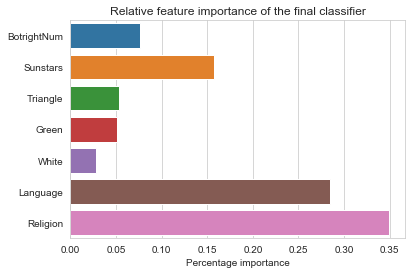

In [60]:
sns.barplot(x=final_feat_importances, y=final_features.columns)
plt.title('Relative feature importance of the final classifier')
plt.xlabel('Percentage importance')
plt.show()

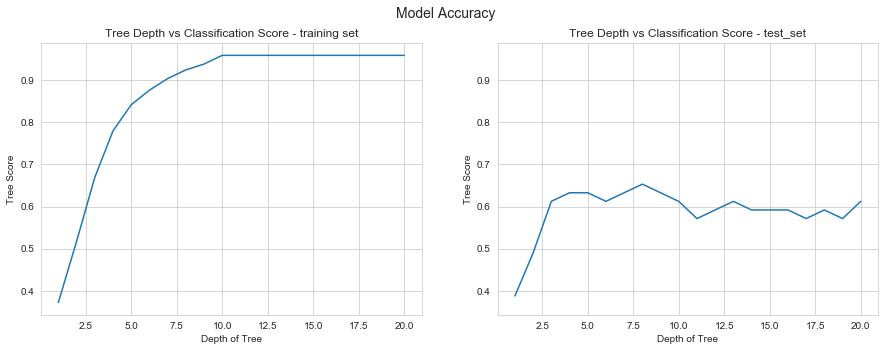

In [61]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5))
plt.suptitle('Model Accuracy', fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x=tree_depth, y=final_scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - training set')

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
ax2 = sns.lineplot(x=tree_depth, y=final_test_scores)
plt.xlabel('Depth of Tree')
plt.ylabel('Tree Score')
plt.title('Tree Depth vs Classification Score - test_set')

plt.show()

# Final results

The final classifier uses only 7 features, which is half the number of features of the first classifier, and improves the classification accuracy from a maximum of 55% to a maximum of 63%.

The average classifier score is shown below:

In [81]:
first_tree_mean = round(np.mean(test_scores),2)
second_tree_mean = round(np.mean(new_test_scores),2)
third_tree_mean = round(np.mean(final_test_scores),2)
print("First tree average score: {}\n".format(first_tree_mean),
      "Second tree average score: {}\n".format(second_tree_mean),
      "Third tree average score: {}\n".format(third_tree_mean))

First tree average score: 0.46
 Second tree average score: 0.45
 Third tree average score: 0.59

